### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [1]:
## Import libraries and data
## liner regression
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

## hypothesis testing
import seaborn as sns
from scipy import stats

**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [2]:
## Your code goes here

## read ../Data/london_bikes.csv into a dataframe named london_bikes
london_bikes = pd.read_csv('../Data/london_bikes.csv')


In [3]:
london_bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,NaN,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,NaN,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,NaN,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,NaN,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,NaN,39.0,17.9,12.1,20.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27T00:00:00Z,16959,2024,Sat,Jan,4,4.0,NaN,10331.0,39.0,0.0,0.0,21.0,4.5,NaN,12.2,True
4930,2024-01-28T00:00:00Z,15540,2024,Sun,Jan,4,3.0,NaN,10230.0,63.0,0.0,0.0,59.0,6.6,NaN,12.5,True
4931,2024-01-29T00:00:00Z,22839,2024,Mon,Jan,5,8.0,NaN,10222.0,18.0,0.0,0.0,0.0,8.8,NaN,8.8,False
4932,2024-01-30T00:00:00Z,22303,2024,Tue,Jan,5,8.0,NaN,10277.0,19.0,0.0,0.0,0.0,8.3,NaN,12.0,False


In [4]:
# show columns with missing values
london_bikes.isnull().sum()
# fill missing values in cloud_cover, humidity, pressure and radiation with 0 but save as different dataframe
london_bikes_filled = london_bikes.fillna({'cloud_cover': 0, 'humidity': 0, 'pressure': 0, 'radiation': 0, 'snow_depth': 0})
# check if there are still missing values
london_bikes.isnull().sum()

date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64

In [5]:
# Convert date columns to datetime format
london_bikes_filled['date'] = pd.to_datetime(london_bikes_filled['date'])
london_bikes['date'] = pd.to_datetime(london_bikes['date'])

# Extract month from date columns (string format)
london_bikes_filled['month'] = london_bikes_filled['date'].dt.strftime('%B').str[:3]
london_bikes['month'] = london_bikes['date'].dt.strftime('%B').str[:3]

# Extract year from date columns
london_bikes_filled['year'] = london_bikes_filled['date'].dt.year
london_bikes['year'] = london_bikes['date'].dt.year

# Extract day from date columns
london_bikes_filled['day'] = london_bikes_filled['date'].dt.day
london_bikes['day'] = london_bikes['date'].dt.day

# Create season columns based on month mapping
season_mapping = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall'
}
london_bikes_filled['season'] = london_bikes_filled['month'].map(season_mapping)
london_bikes['season'] = london_bikes['month'].map(season_mapping)

# convert season to categorical type
london_bikes_filled['season'] = pd.Categorical(london_bikes_filled['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)
london_bikes['season'] = pd.Categorical(london_bikes['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'], ordered=True)

# convert month to categorical type
london_bikes_filled['month'] = pd.Categorical(london_bikes_filled['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
london_bikes['month'] = pd.Categorical(london_bikes['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# convert day to categorical type
london_bikes_filled['day'] = pd.Categorical(london_bikes_filled['day'], categories=list(range(1, 32)), ordered=True)
london_bikes['day'] = pd.Categorical(london_bikes['day'], categories=list(range(1, 32)), ordered=True)

# convert year to categorical type, ranging from 2010 to 2025
london_bikes_filled['year'] = pd.Categorical(london_bikes_filled['year'], categories=list(range(2010, 2026)), ordered=True)
london_bikes['year'] = pd.Categorical(london_bikes['year'], categories=list(range(2010, 2026)), ordered=True)

# convert week to categorical type
london_bikes_filled['week'] = pd.Categorical(london_bikes_filled['week'], categories=list(range(1, 54)), ordered=True)
london_bikes['week'] = pd.Categorical(london_bikes['week'], categories=list(range(1, 54)), ordered=True)

# convert wday to categorical type
london_bikes_filled['wday'] = pd.Categorical(london_bikes_filled['wday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
london_bikes['wday'] = pd.Categorical(london_bikes['wday'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)


# check if both dataframes are equal except for the missing values, highlight the differences
london_bikes.compare(london_bikes_filled)

london_bikes_filled.dtypes
london_bikes.dtypes


date             datetime64[ns, UTC]
bikes_hired                    int64
year                        category
wday                        category
month                       category
week                        category
cloud_cover                  float64
humidity                     float64
pressure                     float64
radiation                    float64
precipitation                float64
snow_depth                   float64
sunshine                     float64
mean_temp                    float64
min_temp                     float64
max_temp                     float64
weekend                         bool
day                         category
season                      category
dtype: object

In [6]:
# new variable: london_bikes_fill2, which first copy the london_bikes, then fills missing values in humidity with the average of the closest 10 values
london_bikes_fill2 = london_bikes.sort_values(by='date').copy()
# then fills missing values in humidity with the average of the closest values, taking in consideration that if the gap exceeds 4, it will use monthly average
london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].interpolate(method='linear', limit=4)
# then fills remaining missing values in humidity with the average of the same month
london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['humidity'].transform('mean'))

# the same thing with other variables
london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].interpolate(method='linear', limit=4)
london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['cloud_cover'].transform('mean'))
london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].interpolate(method='linear', limit=4)
london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['pressure'].transform('mean'))
london_bikes_fill2['radiation'] = london_bikes_fill2['radiation'].interpolate(method='linear', limit=4)
london_bikes_fill2['radiation'] = london_bikes_fill2['radiation'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['radiation'].transform('mean'))
london_bikes_fill2['precipitation'] = london_bikes_fill2['precipitation'].interpolate(method='linear', limit=4)
london_bikes_fill2['precipitation'] = london_bikes_fill2['precipitation'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['precipitation'].transform('mean'))
london_bikes_fill2['sunshine'] = london_bikes_fill2['sunshine'].interpolate(method='linear', limit=4)
london_bikes_fill2['sunshine'] = london_bikes_fill2['sunshine'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['sunshine'].transform('mean'))
london_bikes_fill2['mean_temp'] = london_bikes_fill2['mean_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['mean_temp'] = london_bikes_fill2['mean_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['mean_temp'].transform('mean'))
london_bikes_fill2['max_temp'] = london_bikes_fill2['max_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['max_temp'] = london_bikes_fill2['max_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['max_temp'].transform('mean'))
london_bikes_fill2['min_temp'] = london_bikes_fill2['min_temp'].interpolate(method='linear', limit=4)
london_bikes_fill2['min_temp'] = london_bikes_fill2['min_temp'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['min_temp'].transform('mean'))  

# about snow_depth, fill missing values with 0
london_bikes_fill2['snow_depth'] = london_bikes_fill2['snow_depth'].fillna(0)

london_bikes_fill2.isnull().sum()

/tmp/ipykernel_8611/3208740066.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['humidity'] = london_bikes_fill2['humidity'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['humidity'].transform('mean'))
/tmp/ipykernel_8611/3208740066.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['cloud_cover'] = london_bikes_fill2['cloud_cover'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['cloud_cover'].transform('mean'))
/tmp/ipykernel_8611/3208740066.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  london_bikes_fill2['pressure'] = london_bikes_fill2['pressure'].fillna(london_bikes_fill2.groupby(london_bikes_fill2['date'].dt.to_period('M'))['pressure'].transform('mean'))
/tmp/ipykernel_8611/3208740066.py:14: UserWarning: Converting to Period

date             0
bikes_hired      0
year             0
wday             0
month            0
week             0
cloud_cover      0
humidity         0
pressure         0
radiation        0
precipitation    0
snow_depth       0
sunshine         0
mean_temp        0
min_temp         0
max_temp         0
weekend          0
day              0
season           0
dtype: int64

In [7]:
london_bikes_fill2

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,day,season
0,2010-07-30 00:00:00+00:00,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,0.0,31.0,17.7,12.3,25.1,False,30,Summer
1,2010-07-31 00:00:00+00:00,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,0.0,47.0,21.1,17.0,23.9,True,31,Summer
2,2010-08-01 00:00:00+00:00,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,0.0,3.0,19.3,14.6,23.4,True,1,Summer
3,2010-08-02 00:00:00+00:00,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,0.0,20.0,19.5,15.6,23.6,False,2,Summer
4,2010-08-03 00:00:00+00:00,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,0.0,39.0,17.9,12.1,20.1,False,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27 00:00:00+00:00,16959,2024,Sat,Jan,4,4.0,85.0,10331.0,39.0,0.0,0.0,21.0,4.5,5.7,12.2,True,27,Winter
4930,2024-01-28 00:00:00+00:00,15540,2024,Sun,Jan,4,3.0,85.0,10230.0,63.0,0.0,0.0,59.0,6.6,5.7,12.5,True,28,Winter
4931,2024-01-29 00:00:00+00:00,22839,2024,Mon,Jan,5,8.0,85.0,10222.0,18.0,0.0,0.0,0.0,8.8,5.7,8.8,False,29,Winter
4932,2024-01-30 00:00:00+00:00,22303,2024,Tue,Jan,5,8.0,85.0,10277.0,19.0,0.0,0.0,0.0,8.3,5.7,12.0,False,30,Winter


Summary 1. 

1. created a new dataframe (london_bikes_filled) that contains no missing value (through filling by 0 method)
2. checked if the date's are correctly derived (they are)
3. added seasons, day of month
4. converted to categorical type: year, month, week, day, weekday
5. ensured numeric types are numerical
6. imported necessary libraries

Summary 2.

1.  created another dataframe (london_bikes_fill2) with a different approach (closest average)
2. replaced london_bikes_filled with london_bikes_fill2

**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



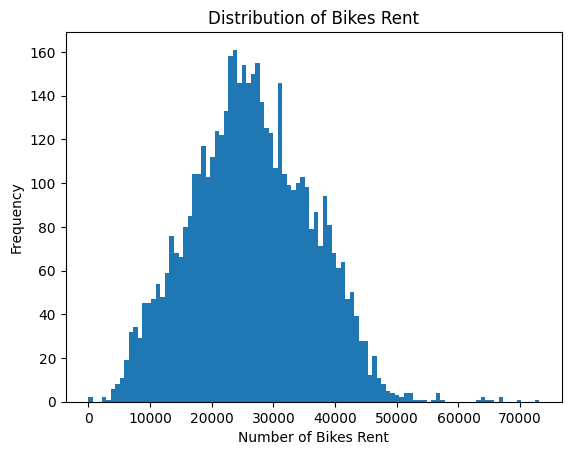

In [8]:
# Plot the distribution of bikes rented.
london_bikes_filled.hist('bikes_hired',bins=100,grid=False)
plt.title('Distribution of Bikes Rent')
plt.xlabel('Number of Bikes Rent')
plt.ylabel('Frequency')
plt.show()
#Comment: Ditribution of bike rents  very close to normal dstribution. 
# This is ggod for linear regression analysis but to make a better prediction, 
# data requires outlier elimination that helps to get much better normal ditribution 

/tmp/ipykernel_8611/978731097.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = london_bikes_filled.groupby('season').agg( total = ('bikes_hired','sum'),
/tmp/ipykernel_8611/978731097.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = london_bikes_filled.groupby('month').agg(total = ('bikes_hired','sum'),


Text(0, 0.5, 'Average Number of Bikes Rented')

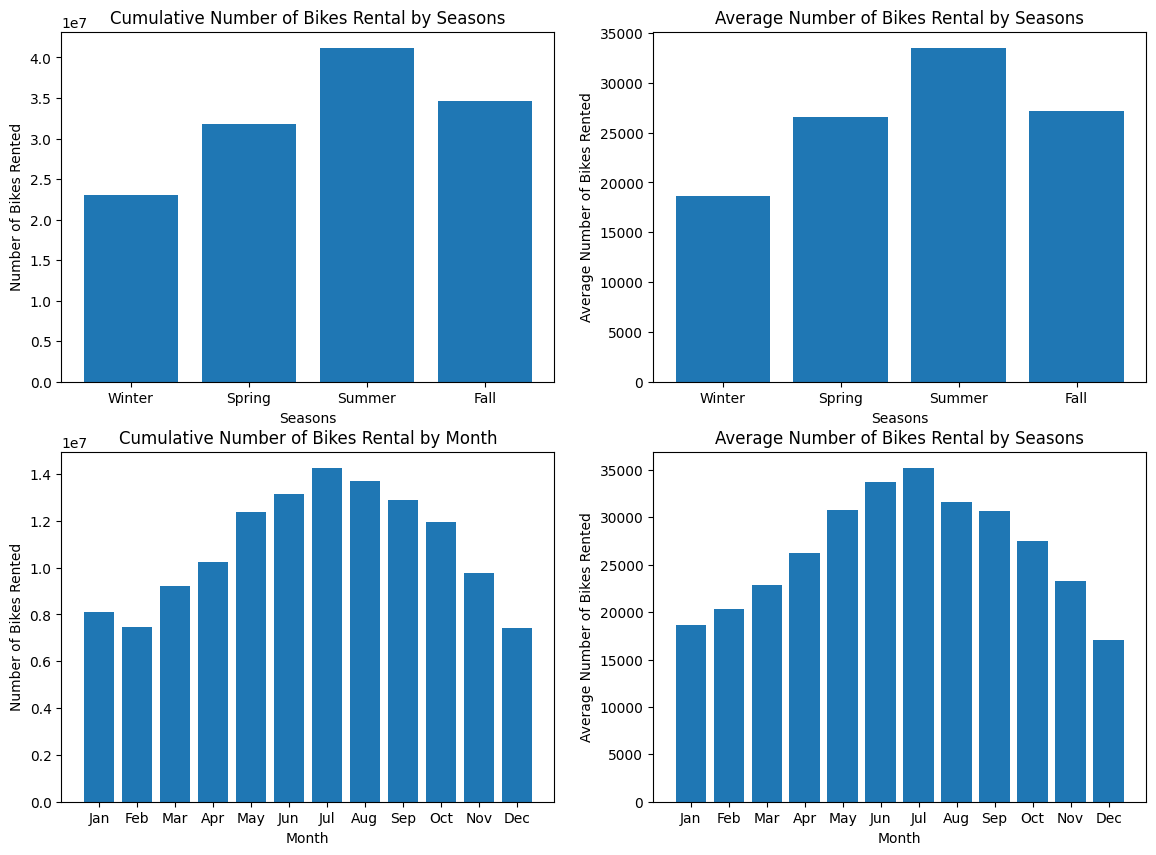

In [9]:
#Explore how rentals vary by season and month.

season_avg = london_bikes_filled.groupby('season').agg( total = ('bikes_hired','sum'),
                                          average = ('bikes_hired','mean')).reset_index()
monthly_avg = london_bikes_filled.groupby('month').agg(total = ('bikes_hired','sum'),
                                          average = ('bikes_hired','mean')).reset_index()


fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

axs[0,0].bar(season_avg.season.sort_values(),season_avg.total)
axs[0,0].set_title('Cumulative Number of Bikes Rental by Seasons')
axs[0,0].set_xlabel('Seasons')
axs[0,0].set_ylabel('Number of Bikes Rented')


axs[0,1].bar(season_avg.season.sort_values(),season_avg.average)
axs[0,1].set_title('Average Number of Bikes Rental by Seasons')
axs[0,1].set_xlabel('Seasons')
axs[0,1].set_ylabel('Average Number of Bikes Rented')


axs[1,0].bar(monthly_avg.month.sort_values(),monthly_avg.total)
axs[1,0].set_title('Cumulative Number of Bikes Rental by Month')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Number of Bikes Rented')


axs[1,1].bar(monthly_avg.month.sort_values(),monthly_avg.average)
axs[1,1].set_title('Average Number of Bikes Rental by Seasons')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Average Number of Bikes Rented')


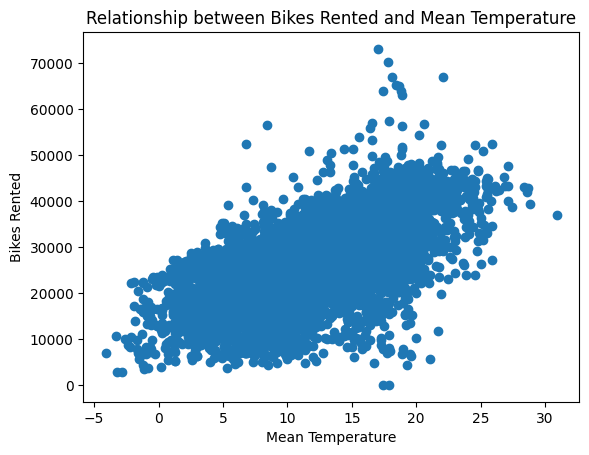

In [10]:
#Investigate the relationship between temperature and bikes rented.
plt.scatter(london_bikes_filled.mean_temp,london_bikes_filled.bikes_hired,)
plt.title('Relationship between Bikes Rented and Mean Temperature')
plt.xlabel('Mean Temperature')
plt.ylabel('Bikes Rented')
plt.show()

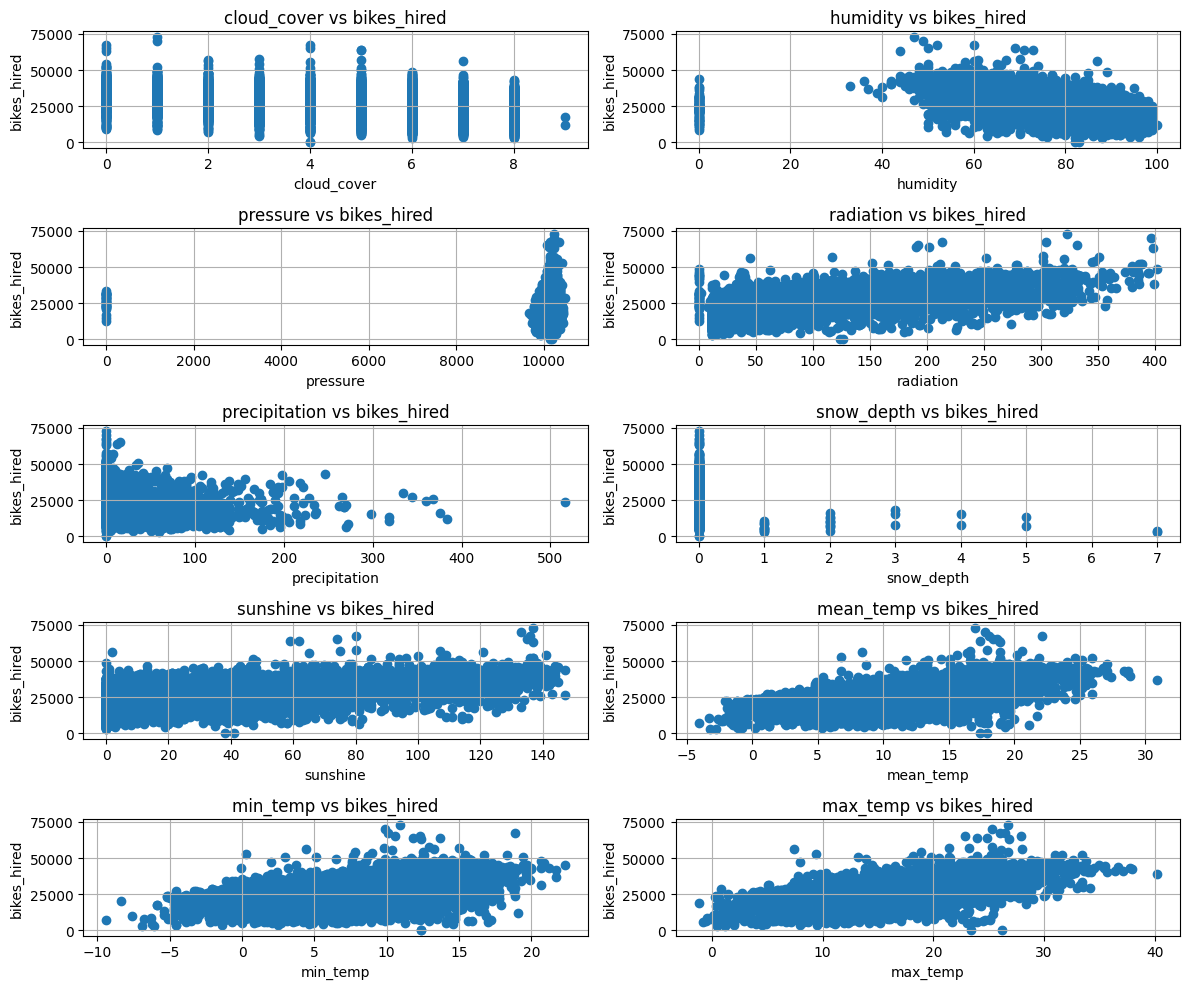

In [11]:
# Creating scatter plots for whole float type variables to exemine relationships between the target 

# Identify the target variable
target = 'bikes_hired'

# Create subplots: one row per variable (except y)
features = list()
for col in london_bikes_filled.columns:
    if col != target and london_bikes_filled[col].dtype == 'float64':
        features.append(col) 
n = len(features) # 10 

fig, axs = plt.subplots(5, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten to easily iterate

# Loop through features and plot
for i, feature in enumerate(features):
    axs[i].scatter(london_bikes_filled[feature], london_bikes_filled[target])
    axs[i].set_title(f'{feature} vs {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)
    axs[i].grid(True)

# If there are empty subplots (more slots than features), hide them
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])  # Removes unused axes

plt.tight_layout()
plt.show()




/tmp/ipykernel_8611/114343382.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('season')]
/tmp/ipykernel_8611/114343382.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('month')]
/tmp/ipykernel_8611/114343382.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(season_grouped, labels=s

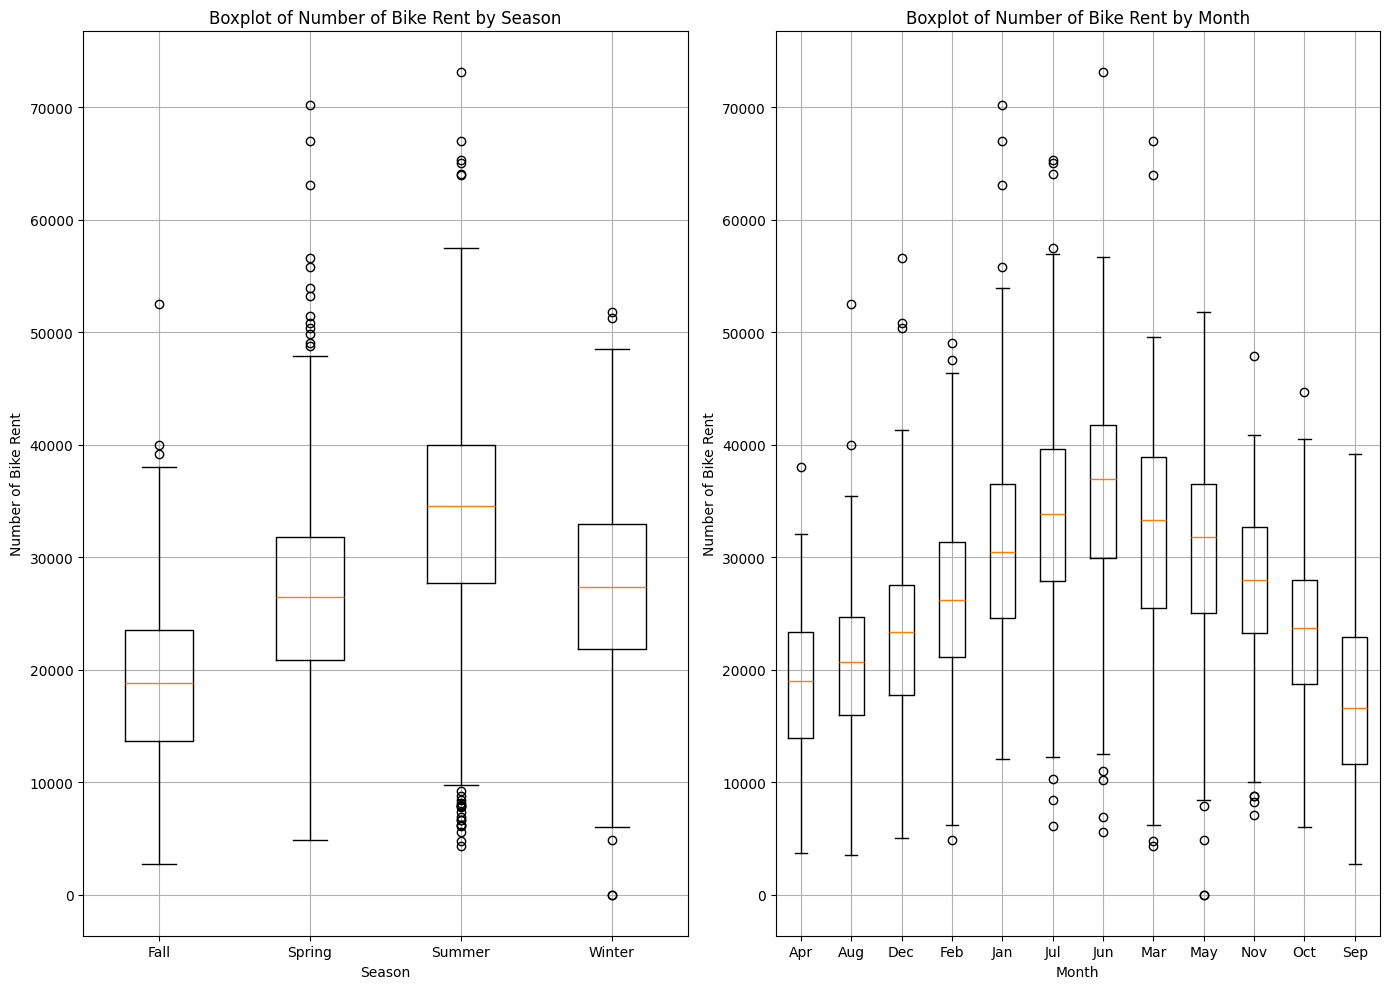

In [12]:
# Plot box-plots to investigate outliers 
fig, axs = plt.subplots(1, 2, figsize=(14, 10))  # 1 row, 2 columns

# Group data by 'season' and 'month' separately
season_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('season')]
month_grouped = [group['bikes_hired'].values for name, group in london_bikes_filled.groupby('month')]

# Boxplot by Season
axs[0].boxplot(season_grouped, labels=sorted(london_bikes_filled['season'].unique()))
axs[0].set_title("Boxplot of Number of Bike Rent by Season")
axs[0].set_xlabel("Season")
axs[0].set_ylabel("Number of Bike Rent")
axs[0].grid(True)

# Boxplot by Month
axs[1].boxplot(month_grouped, labels=sorted(london_bikes_filled['month'].unique()))
axs[1].set_title("Boxplot of Number of Bike Rent by Month")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Number of Bike Rent")
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


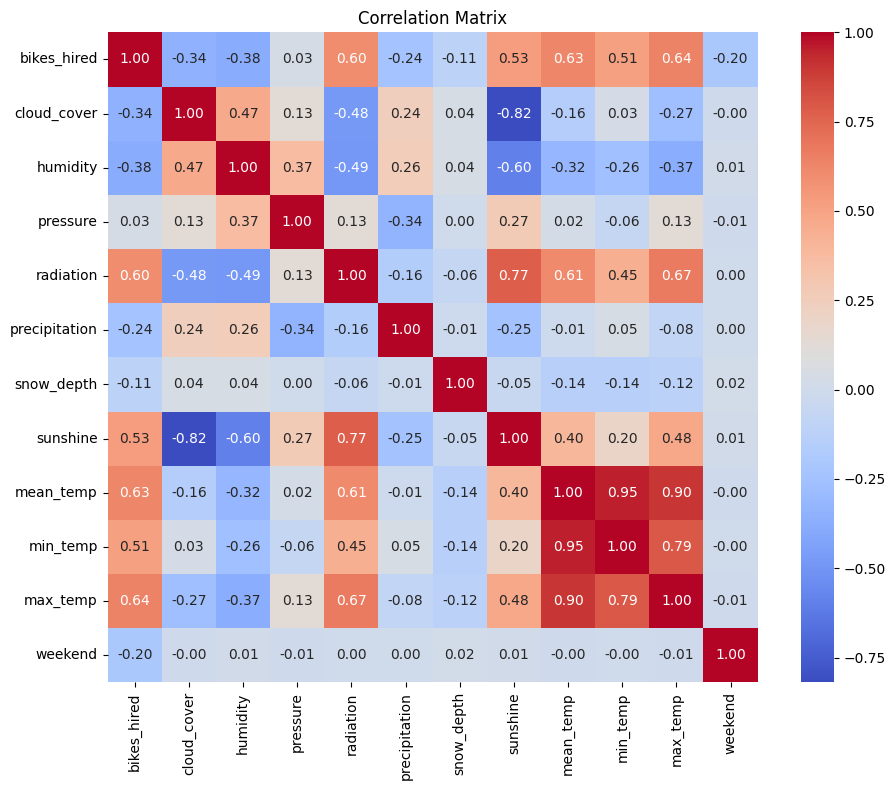

In [13]:
# Correlation matrix to check how variables are correlated with each other 
# Set plot size
corr_matrix = london_bikes_filled.corr(numeric_only=True)
plt.figure(figsize=(10, 8))

# Draw heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [14]:
## Your code goes here

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [15]:
### Your code goes here

## Deliverables
A knitted HTML, one person per group to submit